In [54]:
library(vegan)
library(tidyverse)

In [55]:
# Load in otu tab, shape 3697 OTUs x 82 samples
otu.tab <- read_tsv("../computer_lab/data/AB332_otutab_reduc3.txt")

# Change the rownames to the OTU number
otu.tab <- column_to_rownames(otu.tab, var = "OTUNumber")

Rows: 3697 Columns: 83
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): OTUNumber
dbl (82): Isa_111214, Isa_120117, Isa_120128, Isa_120209, Isa_120216, Isa_12...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [56]:
cat("First few row names:\n")
print(head(rownames(otu.tab)))

cat("\nLast few row names:\n")
print(tail(rownames(otu.tab)))

cat("\nDimensions of otu.tab:\n")
print(dim(otu.tab))

cat("\nColumn names of otu.tab:\n")
print(colnames(otu.tab))

First few row names:
[1] "OTU1"    "OTU10"   "OTU100"  "OTU1000" "OTU1001" "OTU1002"

Last few row names:
[1] "OTU994" "OTU995" "OTU996" "OTU997" "OTU998" "OTU999"

Dimensions of otu.tab:
[1] 3697   82

Column names of otu.tab:
 [1] "Isa_111214" "Isa_120117" "Isa_120128" "Isa_120209" "Isa_120216"
 [6] "Isa_120223" "Isa_120301" "Isa_120308" "Isa_120320" "Isa_120321"
[11] "Isa_120322" "Isa_120323" "Isa_120329" "Isa_120403" "Isa_120411"
[16] "Isa_120416" "Isa_120419" "Isa_120423" "Isa_120426" "Isa_120430"
[21] "Isa_120503" "Isa_120507" "Isa_120508" "Isa_120509" "Isa_120510"
[26] "Isa_120516" "Isa_120524" "Isa_120621" "Isa_120706" "Isa_120806"
[31] "Isa_120823" "Isa_120906" "Isa_120918" "Isa_121031" "Isa_121115"
[36] "Isa_121129" "Isa_121206" "Isa_121213" "Isa_130110" "Isa_130123"
[41] "Isa_130130" "Isa_130219" "Isa_130301" "Isa_130307" "Isa_130315"
[46] "Isa_130320" "Isa_130405" "Isa_130411" "Isa_130419" "Isa_130424"
[51] "Isa_130502" "Isa_130510" "Isa_130515" "Isa_130524" "Isa_130530"
[5

In [57]:
# Tranpose table for vegan package
otu.tab.trans <- t(otu.tab)
otu.tab.trans[1:5, 1:5]
dim(otu.tab.trans)

,OTU1,OTU10,OTU100,OTU1000,OTU1001
Isa_111214,436,2308,83,0,1
Isa_120117,348,2537,36,0,0
Isa_120128,236,1599,21,0,0
Isa_120209,139,1956,30,0,0
Isa_120216,260,328,1,0,0


[1]   82 3697

In [58]:
cat("Number of reads per sample\n")
print(rowSums(otu.tab.trans))

cat("\nNumber of reads per OTU\n")
print(head(colSums(otu.tab.trans)))

Number of reads per sample
Isa_111214 Isa_120117 Isa_120128 Isa_120209 Isa_120216 Isa_120223 Isa_120301 
     35209      21278      13958      21237       9946      13682      15783 
Isa_120308 Isa_120320 Isa_120321 Isa_120322 Isa_120323 Isa_120329 Isa_120403 
     32833      19361      17110      13658      16251      17002      13551 
Isa_120411 Isa_120416 Isa_120419 Isa_120423 Isa_120426 Isa_120430 Isa_120503 
     25606      29877      16194      17161      22305      19942      25237 
Isa_120507 Isa_120508 Isa_120509 Isa_120510 Isa_120516 Isa_120524 Isa_120621 
     27389      19969      34666      17682      25256      40267      24636 
Isa_120706 Isa_120806 Isa_120823 Isa_120906 Isa_120918 Isa_121031 Isa_121115 
     23156      20390      16447      18349      21084      25579      16719 
Isa_121129 Isa_121206 Isa_121213 Isa_130110 Isa_130123 Isa_130130 Isa_130219 
     18961      19634      32244      15691      17092      13309      22312 
Isa_130301 Isa_130307 Isa_130315 Isa_

In [59]:
# Check and remove OTUs with no reads
cat("Number of OTUs with no reads before removal:\n")
print(length(which(colSums(otu.tab.trans) == 0)))

# Remove OTUs with no reads
if (length(which(colSums(otu.tab.trans) == 0)) > 0) {
otu.tab.trans <- otu.tab.trans[, -(which(colSums(otu.tab.trans) == 0))]}

cat("Number of OTUs with no reads after removal:\n")
print(length(which(colSums(otu.tab.trans) == 0)))

cat("Dimensions of otu.tab.trans after removal:\n")
print(dim(otu.tab.trans))

Number of OTUs with no reads before removal:
[1] 253
Number of OTUs with no reads after removal:
[1] 0
Dimensions of otu.tab.trans after removal:
[1]   82 3444


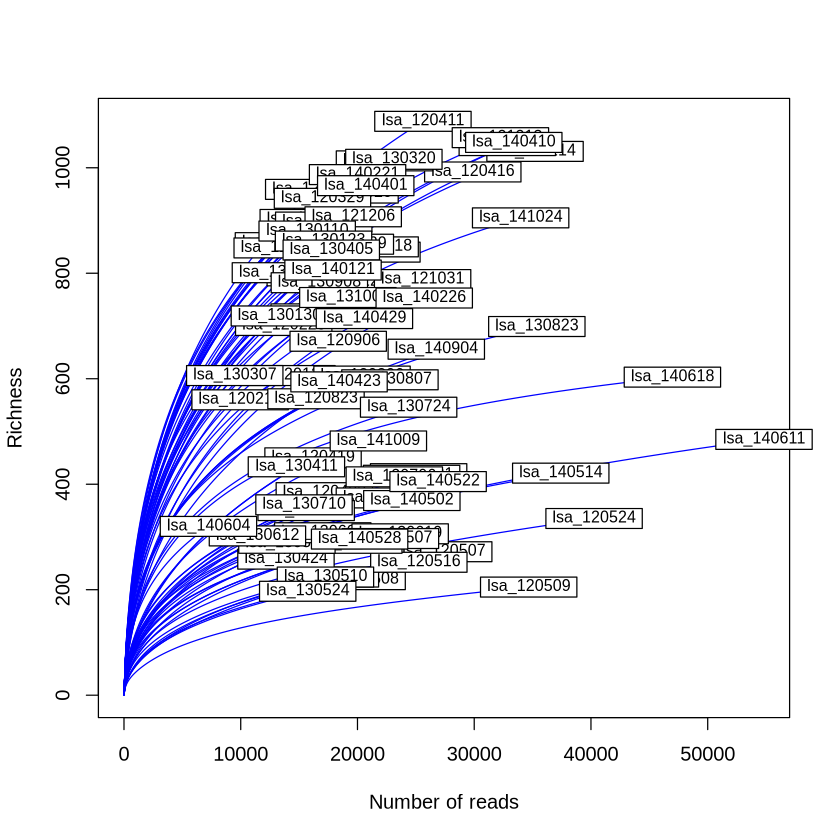

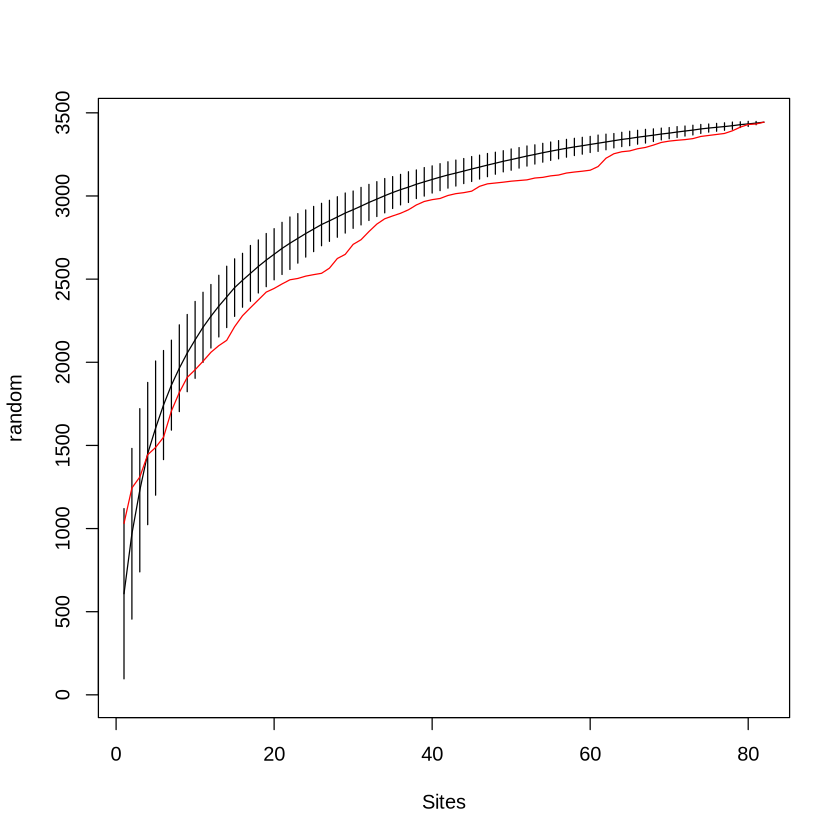

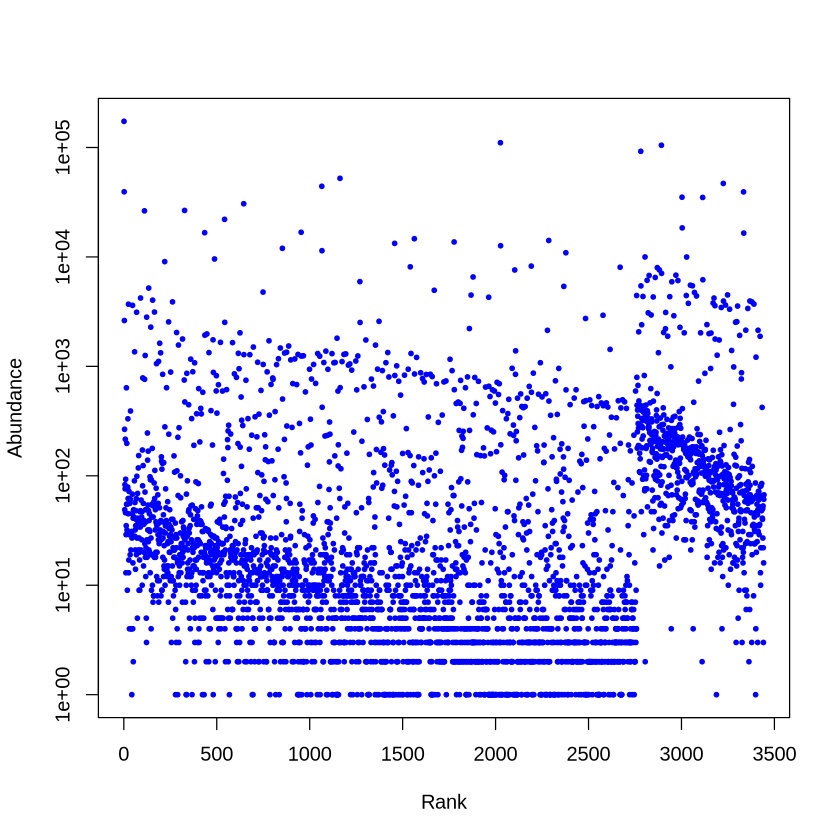

Error in glm.fit(x = structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  : 
  NA/NaN/Inf in 'x'


Warning message:
“glm.fit: algorithm did not converge”


Error in glm.fit(x = structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  : 
  NA/NaN/Inf in 'x'


Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


Error in glm.fit(x = structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  : 
  NA/NaN/Inf in 'x'


Warning message:
“glm.fit: algorithm did not converge”


Error in glm.fit(x = structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  : 
  NA/NaN/Inf in 'x'
Error in glm.fit(x = structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  : 
  NA/NaN/Inf in 'x'
Error in glm.fit(x = structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  : 
  NA/NaN/Inf in 'x'
Error in glm.fit(x = structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  : 
  NA/NaN/Inf in 'x'
Error in glm.fit(x = structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  : 
  NA/NaN/Inf in 'x'
Error in glm.fit(x = structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  : 
  NA/NaN/Inf in 'x'


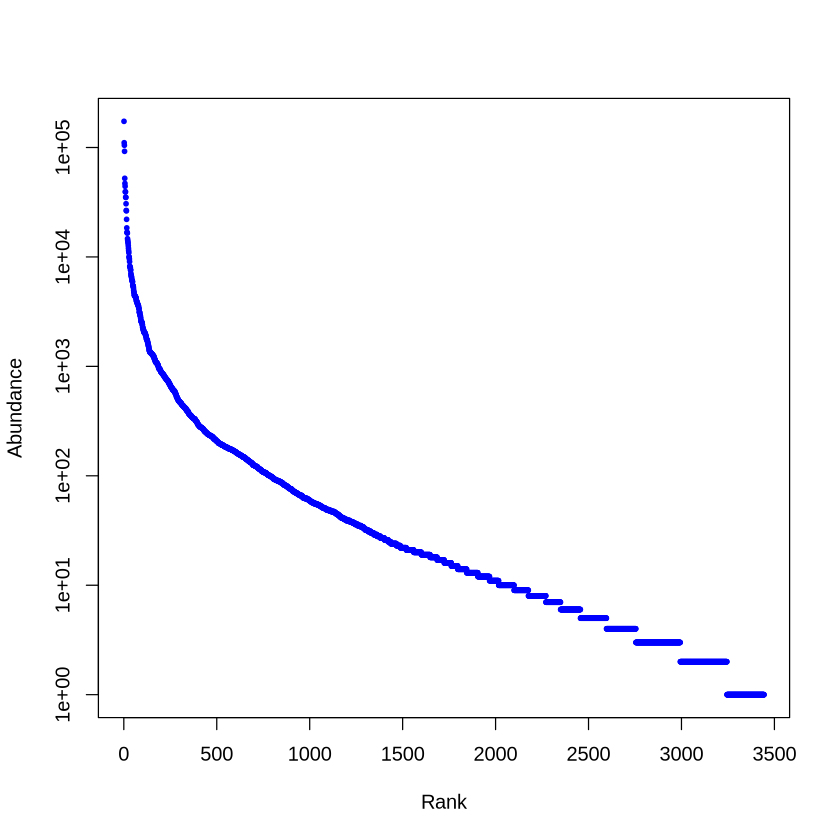

Error in glm.fit(x = structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  : 
  NA/NaN/Inf in 'x'


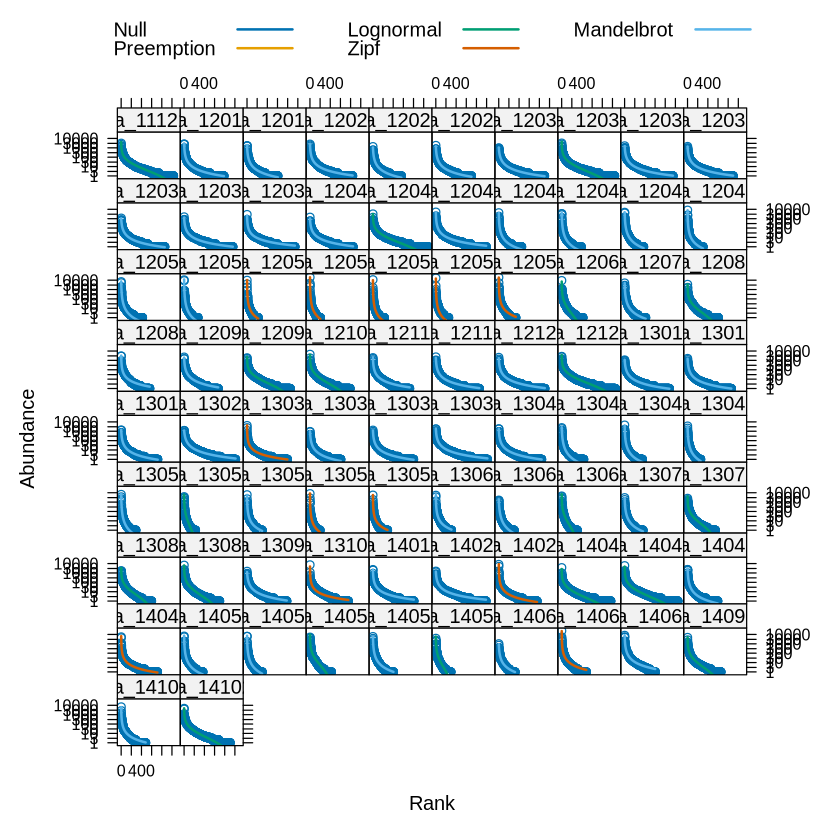

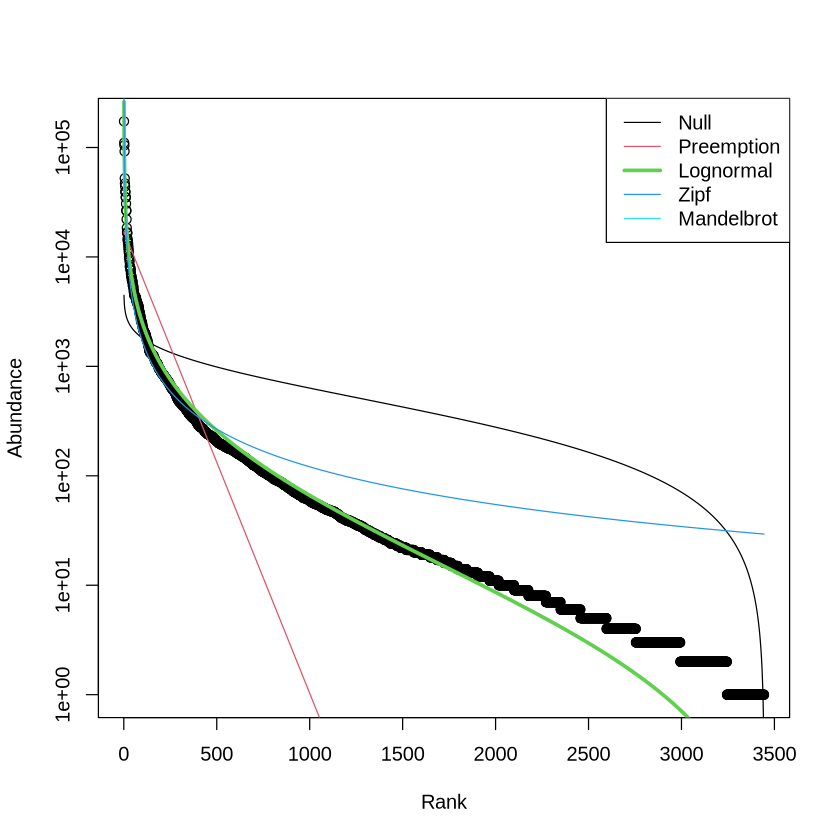

In [60]:
# NOT NEEDED AS GETTING QUANTITATION FROM qPCR

# Create rarefraction curves for number of reads per sample
par(bg = "white")
rarecurve(otu.tab.trans, step = 100, xlab = "Number of reads", ylab = "Richness", col = "blue")

accum.curve <- specaccum(otu.tab.trans, method = "random")
plot(accum.curve)
accum.curve_collector <- specaccum(otu.tab.trans, method = "collector")
plot(accum.curve_collector, add = TRUE, col = "red")

richness <- estimateR(otu.tab.trans, smallsample = TRUE)

par(bg = "white")
plot(colSums(otu.tab.trans), log = "y", xlab = "Rank", ylab = "Abundance", pch = 19, cex = 0.5, col = "blue")
plot(sort(colSums(otu.tab.trans), decreasing = TRUE), log = "y", xlab = "Rank", ylab = "Abundance", pch = 19, cex = 0.5, col = "blue")

mod <- radfit(otu.tab.trans)
plot(mod)

par(bg = "white")
mod.all <- radfit(colSums(otu.tab.trans))
plot(mod.all)

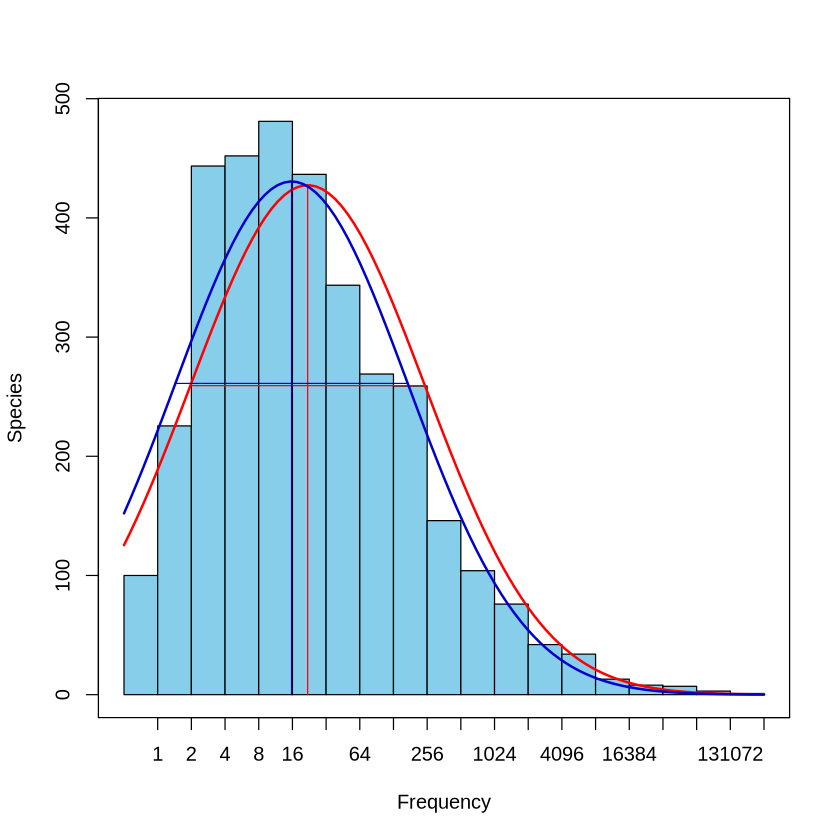

In [61]:
par(bg = "white")
preston <- prestonfit(colSums(otu.tab.trans))
preston.dist <- prestondistr(colSums(otu.tab.trans))
plot(preston)
lines(preston.dist, line.col = "blue3")

In [62]:
veiledspec(preston)
veiledspec(preston.dist)

Extrapolated     Observed       Veiled 
   3730.4269    3444.0000     286.4269

Extrapolated     Observed       Veiled 
   3721.4915    3444.0000     277.4915

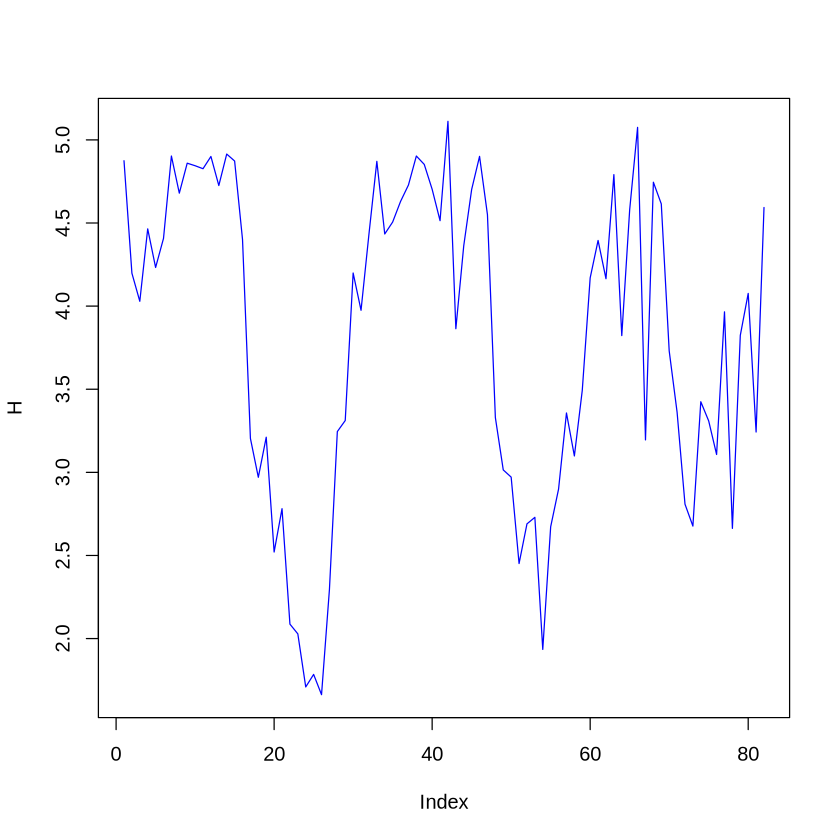

In [63]:
par(bg = "white")
H <- diversity(otu.tab.trans, index = "shannon")
plot(H, type = "l", col = "blue")

In [64]:
J <- H / log(rowSums(otu.tab.trans > 0))

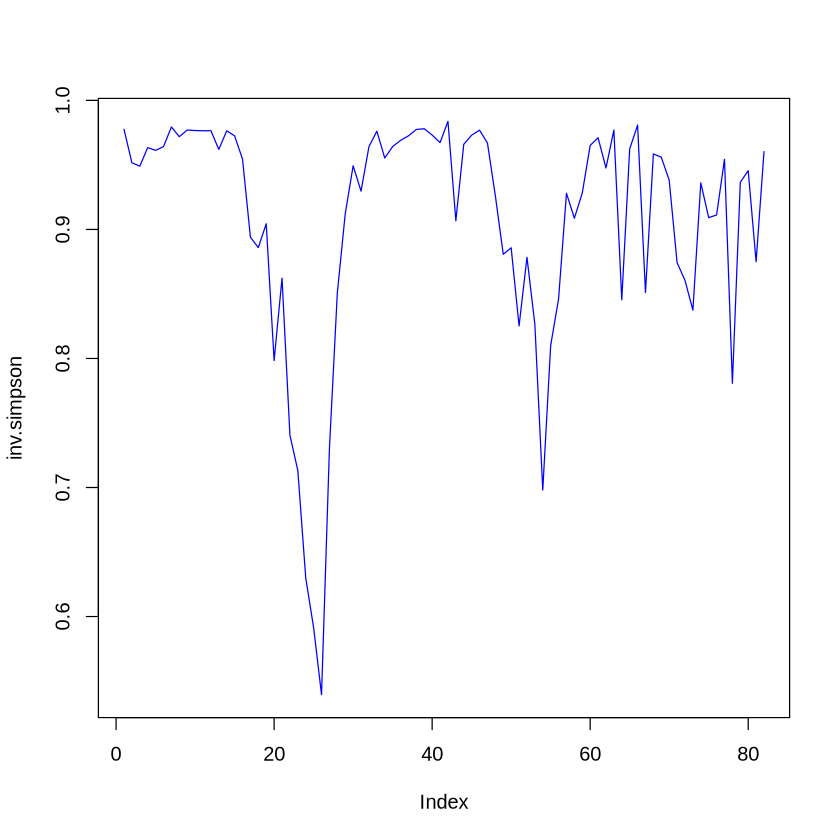

In [65]:
par(bg = "white")
inv.simpson <- diversity(otu.tab.trans, "simpson")
plot(inv.simpson, type = "l", col = "blue")

In [66]:
cat("Minimum number of reads in a sample:\n")
print(min(rowSums(otu.tab.trans)))

# Rarefy the data to the lowest number of reads
otu.tab.trans.ss <- rrarefy(otu.tab.trans, min(rowSums(otu.tab.trans))) # Samples are rarefied to lowest number of reads

Minimum number of reads in a sample:
[1] 7236


In [67]:
dim(otu.tab.trans)
dim(otu.tab.trans.ss)

[1]   82 3444

[1]   82 3444

In [68]:
cat("Number of OTUs with no reads in the original table:\n")
print(length(which(colSums(otu.tab.trans) == 0)))

cat("\nNumber of OTUs with no reads in the rarified table:\n")
print(length(which(colSums(otu.tab.trans.ss) == 0)))

Number of OTUs with no reads in the original table:
[1] 0

Number of OTUs with no reads in the rarified table:
[1] 396


In [69]:
# Find the number of OTUs with zero abundance before removal
cat("Number of OTUs with zero abundance before removal:\n")
print(length(which(colSums(otu.tab.trans.ss) == 0)))

# Remove OTUs with zero abundance in the rarefied table
if (length(which(colSums(otu.tab.trans.ss) == 0)) > 0) {
    otu.tab.trans.ss.nozero <- otu.tab.trans.ss[, -(which(colSums(otu.tab.trans.ss) == 0))]
}

# Check that no zero abundance OTUs are left
cat("Number of OTUs with zero abundance after removal:\n")
print(length(which(colSums(otu.tab.trans.ss.nozero) == 0)))

# Print dimensions of the tables
cat("Dimensions of the original rarefied table:\n")
print(dim(otu.tab.trans.ss))

cat("Dimensions of the rarefied table after zero abundance OTUs removal:\n")
print(dim(otu.tab.trans.ss.nozero))

Number of OTUs with zero abundance before removal:
[1] 396
Number of OTUs with zero abundance after removal:
[1] 0
Dimensions of the original rarefied table:
[1]   82 3444
Dimensions of the rarefied table after zero abundance OTUs removal:
[1]   82 3048


In [70]:
save.image("AB332_lab_I.RData")